# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage

## Load Data 

In [2]:
df = pd.read_csv("healthcare_dataset.csv")

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


### **1. Data Cleaning, Transformation**

In [3]:
# a. Missing values
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Tidak ada missing value, maka lanjut ke step berikutnya

In [4]:
# b. Types of the data
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [5]:
# c. Categorical variables

# Categorical feature that needs to be encoded into numerical format

type = (df.dtypes == 'object')
object_value = list(type[type].index)
print(f'Categorical feature in the Dataset:-{object_value}')

Categorical feature in the Dataset:-['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


In [6]:
# I choose column Gender, Admission Type, and Test Results that need to be encoded

label_encoder = LabelEncoder()

# Encoding label for Column Gender
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Encoding label for Column Blood Type
df['Blood Type'] = label_encoder.fit_transform(df['Blood Type'])

# Encoding label for Column Medical Condition
df['Medical Condition'] = label_encoder.fit_transform(df['Medical Condition'])

# Encoding label for Column Admission Type
df['Admission Type'] = label_encoder.fit_transform(df['Admission Type'])

# Encoding label for Column Medication
df['Medication'] = label_encoder.fit_transform(df['Medication'])

# Encoding label for Column Test Results
df['Test Results'] = label_encoder.fit_transform(df['Test Results'])


df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,0,7,3,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,0,2022-12-01,0,1
1,Ruben Burns,35,1,6,1,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,1,2023-06-15,2,2
2,Chad Byrd,61,1,5,5,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,1,2019-02-08,2,2
3,Antonio Frederick,49,1,5,1,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,2,2020-05-03,4,0
4,Mrs. Brandy Flowers,51,1,7,0,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,2,2021-08-02,3,2


In [7]:
# d. Drop columns that aren't really important
columns_to_drop = ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider','Billing Amount', 'Room Number', 'Admission Type','Discharge Date']
df = df.drop(columns=columns_to_drop, axis=1)

df.head()

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,0,7,3,0,1
1,35,1,6,1,2,2
2,61,1,5,5,2,2
3,49,1,5,1,4,0
4,51,1,7,0,3,2


### **2. Visualization (EDA)**

In [8]:
df.describe()

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,51.452200,0.492500,3.501100,2.487500,2.02080,0.981100
std,19.588974,0.499969,2.286071,1.701803,1.41858,0.819762
min,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,0.000000,2.000000,1.000000,1.00000,0.000000
50%,52.000000,0.000000,3.000000,2.000000,2.00000,1.000000
75%,68.000000,1.000000,5.000000,4.000000,3.00000,2.000000
max,85.000000,1.000000,7.000000,5.000000,4.00000,2.000000


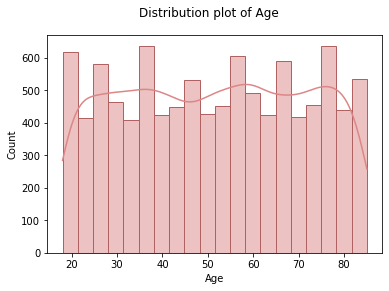

In [9]:
sns.histplot(data=df, x='Age', bins=20, kde=True, color='#DC8686', edgecolor='#B06161')

plt.suptitle("Distribution plot of Age")
plt.show()

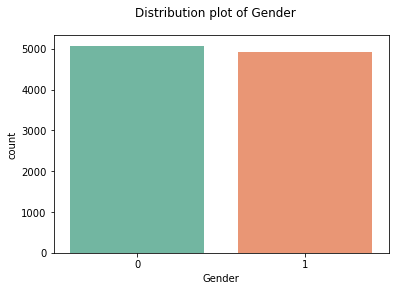

In [10]:
# Distribution plot of column Gender
sns.countplot(x='Gender', data=df, palette='Set2')

plt.suptitle('Distribution plot of Gender')
plt.show()

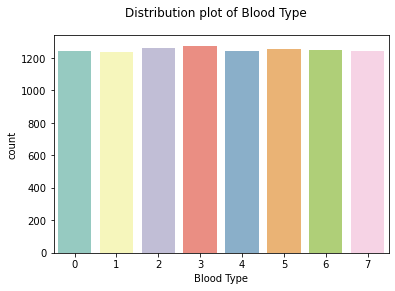

In [11]:
# Distribution plot of column Blood Type
sns.countplot(x='Blood Type', data=df, palette='Set3')

plt.suptitle('Distribution plot of Blood Type')
plt.show()

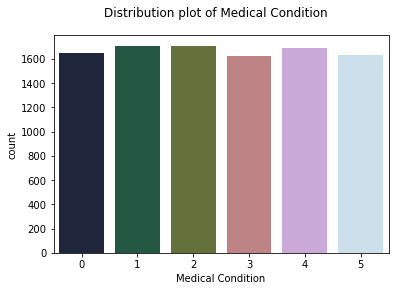

In [12]:
# Distribution plot of column Medical Condition
sns.countplot(x='Medical Condition', data=df, palette='cubehelix')

plt.suptitle('Distribution plot of Medical Condition')
plt.show()

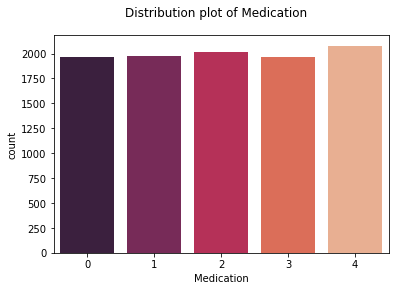

In [13]:
# Distribution plot of column Medication
sns.countplot(x='Medication', data=df, palette='rocket')

plt.suptitle('Distribution plot of Medication')
plt.show()

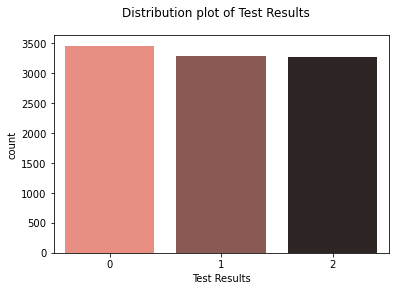

In [14]:
# Distribution plot of column Test Results
sns.countplot(x='Test Results', data=df, palette='dark:salmon_r')

plt.suptitle('Distribution plot of Test Results')
plt.show()

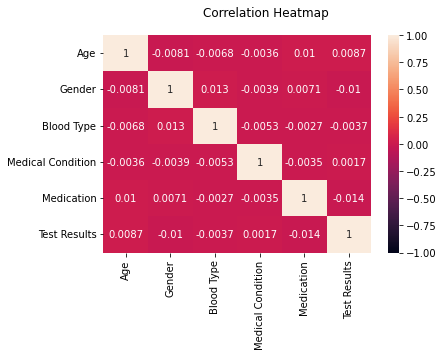

In [15]:
# Correlation Heatmap 
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

plt.suptitle('Correlation Heatmap')
plt.show()

##### **2. Machine Learning Techniques (Logistic Regression)**

In [16]:
X = df.drop(columns=["Test Results"])  # Variabel independen (semua kolom kecuali Test results)
y = df["Test Results"]  # Variabel dependen (Test results)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9000, 5) (9000,)
Test set: (1000, 5) (1000,)


In [18]:
# Do scalling feature on Variable X_train and X_test 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)

accuracy = model.score(X_test_scaled, y_test)
print("Logistic Regression model accuracy:", accuracy)

Logistic Regression model accuracy: 0.333


In [20]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [21]:
# test the model with the test dataset
y_pred_test = model.predict(X_test_scaled)
print(y_pred_test)

[0 0 0 0 1 2 1 0 0 0 0 0 1 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 0 0 0 0 0
 0 0 0 2 0 2 0 0 0 2 2 2 2 1 0 1 1 0 2 0 0 2 0 0 2 0 0 0 0 0 1 2 0 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 2 1 0 0 0 0 0 0 2 1 0 0 0 0 2
 1 0 0 2 0 0 0 0 0 0 0 2 0 0 0 1 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 2 0 1
 0 0 0 0 2 0 0 2 0 0 0 0 2 2 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 2 0 1 2 0 0
 0 0 0 0 2 0 0 0 1 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 2 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 2 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 2 1 0
 2 0 0 0 0 2 0 0 0 0 0 0 

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusionmatrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("Confusion Matrix")
print(confusionmatrix)

print(f"Accuracy Score: {accuracy:.4f}")

Confusion Matrix
[[255  40  47]
 [257  38  34]
 [262  27  40]]
Accuracy Score: 0.3330


##### **3. Model Algorithm (K-NN)**

In [23]:
knn_classifier =  KNeighborsClassifier(metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [24]:
y_pred_test2 = knn_classifier.predict(X_test_scaled)
print(y_pred_test2)

[1 0 0 0 2 0 0 1 0 1 0 0 2 0 1 2 1 0 0 2 2 1 0 0 2 0 0 0 1 0 0 1 2 2 0 0 1
 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 2 1 0 0 1 1 0 0 2 1 1 0 1 0 0 1 0 0 0 0 1 0
 0 2 0 0 0 1 1 1 0 1 0 0 1 1 2 2 0 0 0 0 2 0 0 1 0 2 0 2 0 0 1 0 0 1 0 0 1
 1 2 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 2 0 2 0 2 0 2 2 0
 2 0 0 1 1 1 1 1 2 1 1 0 1 0 0 1 0 1 0 0 2 0 1 0 0 1 0 0 0 2 1 0 2 0 1 1 1
 1 0 0 0 1 2 2 0 1 0 0 2 2 2 0 1 0 2 0 0 1 1 0 1 1 0 2 2 0 0 2 2 2 0 0 0 1
 1 0 0 2 1 0 2 0 0 0 1 0 0 2 2 1 0 0 0 2 1 1 1 2 1 0 0 0 1 1 1 2 0 0 1 1 1
 1 1 2 0 0 2 2 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 2 0 0 1 0 0 0 0 0 0 2 0 0
 0 1 2 2 0 1 2 2 1 0 0 1 1 0 0 1 0 0 1 2 0 1 0 0 1 0 1 2 0 0 2 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 2 2 0 1 0 0 1 1 1 1 1 0 0 2 1 0 0 0 0 1 1 1 2 0 1 1 1
 0 0 0 0 0 1 2 0 1 0 1 2 0 1 2 1 0 1 1 0 0 1 2 1 0 2 0 0 0 1 0 1 0 2 2 0 0
 0 1 1 2 0 0 2 2 1 2 1 0 0 2 0 1 2 0 2 0 1 0 2 2 0 0 1 2 0 0 0 2 0 0 1 0 0
 1 1 1 1 1 2 1 1 0 0 0 2 1 0 0 2 0 2 2 0 1 2 0 1 0 2 0 0 2 1 0 0 0 0 0 0 2
 1 0 0 1 0 1 0 0 0 2 2 1 

In [25]:
confusionmatrix3 = confusion_matrix(y_test, y_pred_test2)
accuracy3 = accuracy_score(y_test, y_pred_test2)

print("Confusion Matrix")
print(confusionmatrix3)

print(f"Accuracy Score: {accuracy3:.1f}")

Confusion Matrix
[[151 133  58]
 [168  96  65]
 [167  88  74]]
Accuracy Score: 0.3


##### **2. Machine Learning Techniques (K-Means Clustering)**

In [26]:
scaler = StandardScaler()
kmeansclus_df = scaler.fit_transform(df)

kmeansclus_df = pd.DataFrame(kmeansclus_df, columns=["Age", "Gender", "Blood Type", "Medical Condition", "Medication", "Test Result"])

kmeansclus_df.head()

,Age,Gender,Blood Type,Medical Condition,Medication,Test Result
0,1.508465,-0.985111,1.530606,0.301166,-1.424595,0.023057
1,-0.839912,1.015114,1.093153,-0.874117,-0.014663,1.242984
2,0.487431,1.015114,0.655699,1.476449,-0.014663,1.242984
3,-0.125189,1.015114,0.655699,-0.874117,1.395268,-1.196870
4,-0.023086,1.015114,1.530606,-1.461758,0.690302,1.242984


In [27]:
from sklearn.metrics import silhouette_score

kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42}

# check the inertia for each K
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(kmeansclus_df)
    WCSS.append(kmeans.inertia_)

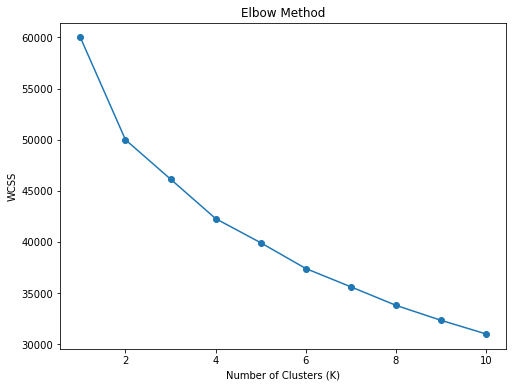

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [29]:
from kneed import KneeLocator

findknee = KneeLocator(range(1, 11), WCSS, curve="convex", direction="decreasing")
print('The best k for your model is ', findknee.elbow)

The best k for your model is  4


In [30]:
kmeans = KMeans(n_init=3 , n_clusters=4, max_iter=300, random_state=42)

ykmeans= kmeans.fit_predict(kmeansclus_df)
df['K-Means']= ykmeans

df.groupby('K-Means').agg(Age = ('Age', 'mean'), Gender = ('Gender', pd.Series.mode), BloodType = ('Blood Type', 'mean'), 
                        MedicalCondition = ('Medical Condition', 'mean'), Medication = ('Medication', 'mean'), TestResult = ('Test Results', 'mean'))


,Age,Gender,BloodType,MedicalCondition,Medication,TestResult
K-Means,,,,,,
0,45.778311,0,3.437375,2.613445,1.921569,1.665466
1,57.370814,1,3.593220,2.408847,2.069450,1.663084
2,45.422586,1,3.469673,2.550279,1.994014,0.305666
3,57.264363,0,3.506988,2.378106,2.097438,0.333851


##### **3. Model Algorithm (Hierarchical Clustering)**

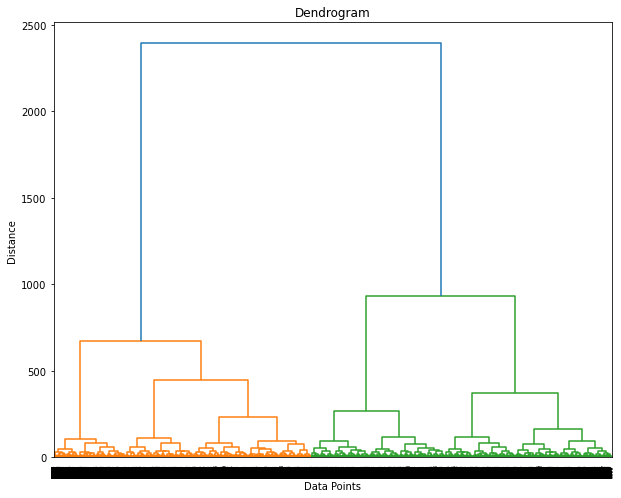

In [34]:
new_data = df.drop('K-Means', axis=1) 

distance_matrix = linkage(new_data, method='ward', metric='euclidean')

plt.figure(figsize=(10, 8))
dendrogram(distance_matrix, orientation='top', p=30, truncate_mode='level', show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [35]:
from scipy.cluster.hierarchy import fcluster

num_clushierarchy = 4 

cluster = fcluster(distance_matrix, num_clushierarchy, criterion='maxclust')

df['Hierarchical_Cluster'] = cluster

In [36]:
df.groupby('Hierarchical_Cluster').agg(Age = ('Age', 'mean'), Gender = ('Gender', pd.Series.mode), BloodType = ('Blood Type', 'mean'), 
                                       MedicalCondition = ('Medical Condition', 'mean'), Medication = ('Medication', 'mean'), TestResult = ('Test Results', 'mean'))


,Age,Gender,BloodType,MedicalCondition,Medication,TestResult
Hierarchical_Cluster,,,,,,
1,21.862822,0,3.614965,2.628215,1.879969,0.971161
2,37.503452,0,3.388772,2.419994,2.079255,0.972381
3,77.129946,0,3.526447,2.539775,2.063723,0.993336
4,59.081742,0,3.557119,2.460302,1.981575,0.985260
